### Competition information provided by Kaggle (verbatim)

**Competition Description**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**Goal**

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

**Metric**

Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

**Submission File Format**

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.
 
**Data Dictionary**

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Set random number generator seeds for reproducibility

In [106]:
from numpy.random import seed
seed(32)
from tensorflow import set_random_seed
set_random_seed(33)

### Import packages and define plot style

In [107]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Import dataset and make copy for modifications

In [108]:
titanic_train = pd.read_csv('./train.csv')
titanic_test = pd.read_csv('./test.csv')
titanic = titanic_train.append(titanic_test)

In [109]:
tw = titanic.copy()

In [110]:
titanic

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


### Perform EDA

In [111]:
print(titanic_train.shape, titanic_test.shape, titanic.shape)

(891, 12) (418, 11) (1309, 12)


Test set represents 32% of the data

In [112]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [113]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see sequential numbering of passengers in PassengerID column extends from training to test sets.

In [114]:
titanic.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

No hidden blank spaces in column names, though might consider changing column names to lowercase

In [115]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Summary: 12 columns and 1309 entries.  263 null values present in Age column, 1014 null values present in Cabin column, 2 null values present in Embarked column.  The number of null values in the Survived column reflect the size of the test set which has been appended to the training set.  Some columns are of numeric type that can likely be converted into categorical type including Survived, Pclass, Sex, SibSp, Parch, and Embarked.  Evaluate with .value_counts

In [116]:
titanic.Survived.value_counts(dropna=False)

 0.0    549
NaN     418
 1.0    342
Name: Survived, dtype: int64

In [117]:
titanic.Pclass.value_counts(dropna=False)

3    709
1    323
2    277
Name: Pclass, dtype: int64

3rd class represented 54% of Titanic passengers

In [118]:
titanic.Sex.value_counts(dropna=False)

male      843
female    466
Name: Sex, dtype: int64

~ twice as many males as females on the Titanic

In [119]:
titanic.SibSp.value_counts(dropna=False)

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [120]:
titanic.Parch.value_counts(dropna=False)

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [121]:
titanic.Embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

70% of passengers embarked from Southampton

In [122]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


Oldest individual on Titanic was aged 80, youngest is 0.17.  Statistics for Fare are interesting and show that while the 75th percentile value is only 31.275, the max has a value of 512.329  Should look into this.

In [123]:
titanic.Fare[titanic.Fare >= 100].count()

84

There were 84 passengers (6.4%) on the Titanic that paid $100 or more their ticket

Check for duplicate values in Name and Ticket and columns

In [124]:
titanic[titanic.Name.duplicated(keep=False)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
289,22.0,NaN,Q,7.7500,"Connolly, Miss. Kate",0,290,3,female,0,1.0,370373
696,44.0,NaN,S,8.0500,"Kelly, Mr. James",0,697,3,male,0,0.0,363592
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
6,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972


Although there are two pairs of entries with duplicated names, they appear to be unique individuals.

In [125]:
titanic.Ticket.nunique()

929

There are only 929 unique values in the Ticket column.  Either these values were not well recorded, or are not intended to be unique identifiers but rather ticket types.  Will need to get further information regarding the meaning of these values.

### Perform Visual EDA

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


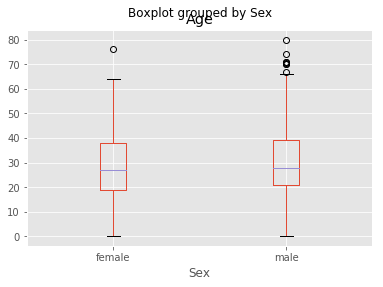

In [126]:
titanic.boxplot(column='Age', by='Sex')
plt.show()

### Preprocess dataset

Start by filling in missing values for age.  Impute age based on mean female age for females and mean male age for males.

In [127]:
tw['Age'] = tw.groupby('Sex').transform(lambda x: x.fillna(x.mean()))

Consider missing values for Embarked feature

In [128]:
tw[tw.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


These two passengers have 0 for SibSp and Parch features so cannot surmize their point of departure based on relatives.  Interesting to note that both have the same ticket number.

As the 70% of passengers embarked from Southampton, impute the two missing values in this column with that (most frequent) value.

In [129]:
tw['Embarked'] = tw.Embarked.fillna(tw.Embarked.mode()[0])

In [130]:
tw[tw.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


Impute single missing Fare value with mean

In [131]:
tw['Fare'] = tw.Fare.fillna(tw.Fare.mean())

Although the Cabin infromation would likely be of considerable value (consider how quickly access to ship deck could be attained, point of entry of water, etc.), the 1014 of 1309 datapoints have missing information for this value.  Therefore, will eliminate this colunm in addition to other columns that will not be used in ml model.

In [132]:
tw = tw.drop(['Ticket','Name','Cabin','PassengerId'], axis=1)

Check state of dataframe

In [133]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [134]:
tw.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


Convert Embarked, Sex, Pclass, and Survived to categorical dtypes.

In [135]:
cols = ['Embarked', 'Sex','Pclass']
for col in cols:
    tw[col] = tw[col].astype('category')

In [136]:
tw = pd.get_dummies(tw, columns=['Embarked', 'Sex','Pclass'], drop_first=True)

In [137]:
tw.head()

,Age,Fare,Parch,SibSp,Survived,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,22.0,7.2500,0,1,0.0,0,1,1,0,1
1,38.0,71.2833,0,1,1.0,0,0,0,0,0
2,26.0,7.9250,0,0,1.0,0,1,0,0,1
3,35.0,53.1000,0,1,1.0,0,1,0,0,0
4,35.0,8.0500,0,0,0.0,0,1,1,0,1


Want to perform feature scaling on Age and Fare columns.  N.B. if running on single feature: StandardScaler from sklearn.preprocessing requires array of shape (X,1).  A pandas Series is of shape (X,), so must get vals as a numpy array, reshape using array.reshape(-1,1), run StandardScaler on reshaped array, and assign values back to dataframe.

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tw[['Age','Fare']] = scaler.fit_transform(tw[['Age','Fare']])

Reorder columns, and then create test and train arrays

In [139]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age           1309 non-null float64
Fare          1309 non-null float64
Parch         1309 non-null int64
SibSp         1309 non-null int64
Survived      891 non-null float64
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
Sex_male      1309 non-null uint8
Pclass_2      1309 non-null uint8
Pclass_3      1309 non-null uint8
dtypes: float64(3), int64(2), uint8(5)
memory usage: 67.8 KB


In [140]:
tw = tw[['Age','Fare','Parch','SibSp','Embarked_Q','Embarked_S','Sex_male','Pclass_2','Pclass_3','Survived']]

In [141]:
tw_train = tw[tw.Survived.notnull()]
tw_to_predict = tw[tw.Survived.isnull()]
X = tw_train.iloc[:,:-1].values
y = tw_train.iloc[:,-1].values
X_predict = tw_to_predict.iloc[:,:-1].values

In [142]:
print (type(X), X.shape, type(y), y.shape, type(X_predict), X_predict.shape)

<class 'numpy.ndarray'> (891, 9) <class 'numpy.ndarray'> (891,) <class 'numpy.ndarray'> (418, 9)


Want to use 80% of "Training" data for training, 10% for cross-val, and 10% for model evaluation.  First generate train/test split.  This test set will be left out for final model evaluation.

In [143]:
from sklearn.model_selection import train_test_split
X_minus_holdout, X_holdout, y_minus_holdout, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_minus_holdout, y_minus_holdout, test_size=0.11, random_state=42)

In [144]:
X_train.shape[0] + X_test.shape[0] + X_holdout.shape[0]

891

### Test simple logistic regression model

In [145]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Determine accuracy of model on test set

In [146]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.808988764045


Plot the ROC curve and calculated AUC

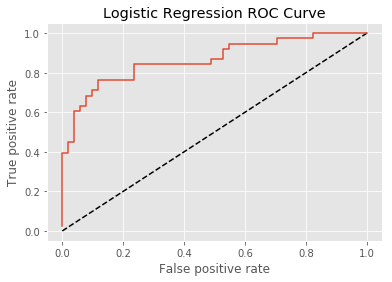

AUC =  0.864293085655


In [147]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
print('AUC = ',roc_auc_score(y_test, y_pred_prob))

### Deep learning model with Keras

Keras seems to require that the target for binary classification be encoded as an (n,2) array

In [148]:
y_train[:10]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.])

In [149]:
y_train_keras = np.concatenate(((y_train.reshape(-1,1) == 0).astype('float64'), y_train.reshape(-1,1)), axis=1)
y_test_keras = np.concatenate(((y_test.reshape(-1,1) == 0).astype('float64'), y_test.reshape(-1,1)), axis=1)

In [150]:
y_train_keras[:10]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

Build and train the model.  Specify architecture of 2 hidden layers each with 50 nodes.  Use the relu activation function for the hidden layers and a softmax activation for the output layer such that probabilities sum to 1.

Import keras modules

In [151]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical 

In [152]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train_keras)

Epoch 1/10
712/712 [==============================] - 0s 178us/step - loss: 0.6101 - acc: 0.6517
Epoch 2/10
712/712 [==============================] - 0s 64us/step - loss: 0.5498 - acc: 0.7022
Epoch 3/10
712/712 [==============================] - 0s 68us/step - loss: 0.5224 - acc: 0.7444
Epoch 4/10
712/712 [==============================] - 0s 65us/step - loss: 0.4995 - acc: 0.7851
Epoch 5/10
712/712 [==============================] - 0s 63us/step - loss: 0.4808 - acc: 0.8090
Epoch 6/10
712/712 [==============================] - 0s 59us/step - loss: 0.4671 - acc: 0.8202
Epoch 7/10
712/712 [==============================] - 0s 61us/step - loss: 0.4506 - acc: 0.8244
Epoch 8/10
712/712 [==============================] - 0s 59us/step - loss: 0.4425 - acc: 0.8216
Epoch 9/10
712/712 [==============================] - 0s 67us/step - loss: 0.4299 - acc: 0.8188
Epoch 10/10
712/712 [==============================] - 0s 65us/step - loss: 0.4216 - acc: 0.8272


In [153]:
predictions = model.predict(X_test)
y_pred_prob_keras = predictions[:,1]
y_pred_keras = np.round(y_pred_prob_keras)

Determine accuracy of model on test set

In [154]:
print(accuracy_score(y_test, y_pred_keras))

0.876404494382


Plot the ROC curve and calculate the AUC

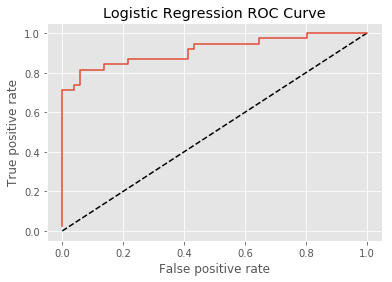

AUC =  0.91382868937


In [155]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_keras)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
print('AUC = ', roc_auc_score(y_test, y_pred_prob_keras))

### Use fitted keras model to predict holdout set

In [156]:
predictions_holdout = model.predict(X_holdout)
y_pred_prob_holdout_keras = predictions_holdout[:,1]
y_pred_hold_keras = np.round(y_pred_prob_holdout_keras)

In [157]:
print(accuracy_score(y_holdout, y_pred_hold_keras))

0.855555555556


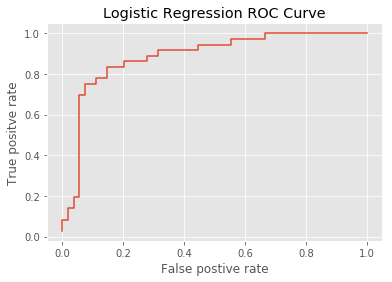

AUC =  0.885288065844


In [158]:
fpr, tpr, thresholds = roc_curve(y_holdout, y_pred_prob_holdout_keras)
plt.plot([0,0],[1,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False postive rate')
plt.ylabel('True positve rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
print('AUC = ', roc_auc_score(y_holdout, y_pred_prob_holdout_keras))

### Use keras deep learning model to predict survival outcome on supplied test set.  Verify shape of output

In [159]:
X_to_predict = tw_to_predict.drop('Survived', axis=1).values
predictions_final = np.round(model.predict(X_to_predict)[:,1]).astype(int)
predictions_final.shape

(418,)

### Combine predicted outcome with PassengerId and print to .csv 

In [160]:
titanic_submission = titanic.PassengerId[titanic.Survived.isnull()].copy().to_frame()
titanic_submission['Survived'] = predictions_final
titanic_submission.to_csv('./predictions.csv', index=False)

### On 1/29/18 uploaded the above generated file to the Kaggle.  Received score of 0.78468 and a place of 3,984 on the public leaderboard (Team name Titanic ML)